In [3]:
# %load ./main.py
import pandas as pd
import numpy as np
from sklearn import preprocessing
import torch
from torch import optim
import torch.nn.functional as F 
from net import housing_NN
import matplotlib.pyplot as plt

def load_data():
    feature=pd.read_excel("BostonHousingData.xlsx", sheet_name="Sheet1", header=0)

    #取出标签，同时在读入的数据中删除标签
    label=feature["MEDV"]
    label=np.array(label)

    feature=feature.drop("MEDV",axis=1)
    data=np.array(feature)

    #对输入数据做归一化
    data=preprocessing.StandardScaler().fit_transform(data)
    

    #print(data)

    #3:1划分测试集和训练集
    train_data=[]
    train_label=[]
    test_data=[]
    test_label=[]
    for i in range(len(data)):
        if(i%3==0):
            test_data.append(data[i])
            test_label.append(label[i])
        else:
            train_data.append(data[i])
            train_label.append(label[i])
    
    #转为tensor向量
    train_data=torch.tensor(train_data,dtype=float,requires_grad=True).to(torch.float32)
    train_label=torch.tensor(train_label,dtype=float,requires_grad=True).to(torch.float32)
    test_data=torch.tensor(test_data,dtype=float,requires_grad=True).to(torch.float32)
    test_label=torch.tensor(test_label,dtype=float,requires_grad=True).to(torch.float32)

    return train_data, train_label, test_data, test_label 

#训练
def train(epoches,model,loss_func,opt,batch_size,data,label):
    print("start training...")
    for epoch in range(epoches):
        for start in range(0,len(data),batch_size):
            if start+batch_size<=len(data):
                end=start+batch_size
            else:
                end=len(data)
            x=data[start:end]
            y=label[start:end]
            model.train()
            pre=model(x)
            loss=loss_func(pre,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
        if epoch%500==0:
            print(f"epoch:{epoch},loss:{loss}")
        if loss<0.1:
            print(f"epoch:{epoch},loss:{loss}")
            print("已达预设") 
            torch.save(model.state_dict(), "best_model.pth")
            print("model saved")
            break
    torch.save(model.state_dict(), "last_model.pth")
    print("model saved")

def test(my_model, test_data, test_label, loss_func):
    pre=[]
    act=[]
    mean_mse = 0 
    print("start testing...")
    my_model.load_state_dict(torch.load("best_model.pth"))
    my_model = my_model.eval()
    for i in range(len(test_data)):
        p=my_model(test_data[i])
        pre.append(p.item())
        act.append(test_label[i].item())
        loss = loss_func(p, test_label[i])
        mean_mse += loss.item() 
    mean_mse /= len(test_data)
    print("mean_mse = " + str(mean_mse))
    plt.figure(1)
    plt.plot(pre,color="r")
    plt.plot(act,color="b")
    plt.savefig("pred.png")


def main(mode):

    my_epoches=80000
    my_model=housing_NN()
    my_loss_func = F.mse_loss
    my_opt=optim.Adam(my_model.parameters(),lr=0.001) 
    my_batch_size=64

    train_data, train_label, test_data, test_label = load_data()

    if mode == "train":
        train(my_epoches,my_model,my_loss_func,my_opt,my_batch_size,train_data,train_label)
    
    if mode == "test":
        test(my_model, test_data, test_label, my_loss_func)  

if __name__ == "__main__":
    #main("train")
    main("test")

        







SyntaxError: invalid non-printable character U+00A0 (3568781210.py, line 88)

C:\Users\ChenJiahao\AppData\Local\Temp\ipykernel_26924\1445003570.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  train_data=torch.tensor(train_data,dtype=float,requires_grad=True).to(torch.float32)
C:\Users\ChenJiahao\AppData\Local\Temp\ipykernel_26924\1445003570.py:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed

start testing...
mean_mse = 6.838989023395891


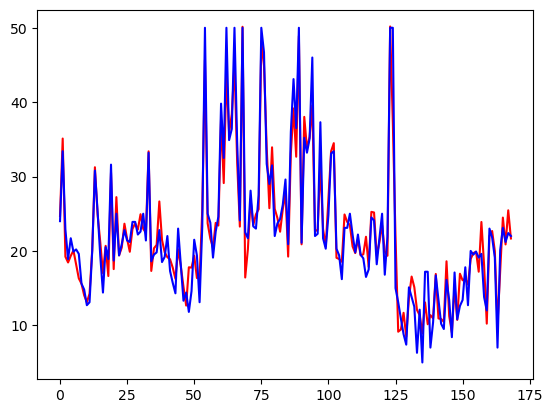

In [11]:
# %load ./main.py
import pandas as pd
import numpy as np
from sklearn import preprocessing
import torch
from torch import optim
import torch.nn.functional as F 
from net import housing_NN
import matplotlib.pyplot as plt

def load_data():
    feature=pd.read_excel("BostonHousingData.xlsx", sheet_name="Sheet1", header=0)

    #取出标签，同时在读入的数据中删除标签
    label=feature["MEDV"]
    label=np.array(label)

    feature=feature.drop("MEDV",axis=1)
    data=np.array(feature)

    #对输入数据做归一化
    data=preprocessing.StandardScaler().fit_transform(data)
    

    #print(data)

    #3:1划分测试集和训练集
    train_data=[]
    train_label=[]
    test_data=[]
    test_label=[]
    for i in range(len(data)):
        if(i%3==0):
            test_data.append(data[i])
            test_label.append(label[i])
        else:
            train_data.append(data[i])
            train_label.append(label[i])
    
    #转为tensor向量
    train_data=torch.tensor(train_data,dtype=float,requires_grad=True).to(torch.float32)
    train_label=torch.tensor(train_label,dtype=float,requires_grad=True).to(torch.float32)
    test_data=torch.tensor(test_data,dtype=float,requires_grad=True).to(torch.float32)
    test_label=torch.tensor(test_label,dtype=float,requires_grad=True).to(torch.float32)

    return train_data, train_label, test_data, test_label 

#训练
def train(epoches,model,loss_func,opt,batch_size,data,label):
    print("start training...")
    for epoch in range(epoches):
        for start in range(0,len(data),batch_size):
            if start+batch_size<=len(data):
                end=start+batch_size
            else:
                end=len(data)
            x=data[start:end]
            y=label[start:end]
            model.train()
            pre=model(x)
            loss=loss_func(pre,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
        if epoch%500==0:
            print(f"epoch:{epoch},loss:{loss}")
        if loss<0.1:
            print(f"epoch:{epoch},loss:{loss}")
            print("已达预设") 
            torch.save(model.state_dict(), "best_model.pth")
            print("model saved")
            break
    torch.save(model.state_dict(), "last_model.pth")
    print("model saved")

def test(my_model, test_data, test_label, loss_func):
    pre=[]
    act=[]
    mean_mse = 0 
    print("start testing...")
    my_model.load_state_dict(torch.load("best_model.pth"))
    my_model = my_model.eval()
    for i in range(len(test_data)):
        p=my_model(test_data[i])
        pre.append(p.item())
        act.append(test_label[i].item())
        loss = loss_func(p, test_label[i])
        mean_mse += loss.item() 
    mean_mse /= len(test_data)
    print("mean_mse = " + str(mean_mse))
    plt.figure(1)
    plt.plot(pre,color="r")
    plt.plot(act,color="b")
    plt.savefig("pred.png")


def main(mode):

    my_epoches=80000
    my_model=housing_NN()
    my_loss_func = F.mse_loss
    my_opt=optim.Adam(my_model.parameters(),lr=0.001) 
    my_batch_size=64

    train_data, train_label, test_data, test_label = load_data()

    if mode == "train":
        train(my_epoches,my_model,my_loss_func,my_opt,my_batch_size,train_data,train_label)
    
    if mode == "test":
        test(my_model, test_data, test_label, my_loss_func)  

if __name__ == "__main__":
    #main("train")
    main("test")

        





